In [13]:
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)


# Combine the data into a single dataset
merged_df = pd.merge(city_df, ride_df, on="city")

# Display the data table for preview
merged_df.head()


,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

In [14]:
## Obtain the x and y coordinates for each of the three city types

# Urban data 
urban_df = merged_df.loc[merged_df['type']=='Urban',:]
urban_df.head()

# Group by city
grp_urban_city = urban_df.groupby('city')


#Average fare ($) per city
urban_city_avg_fare = grp_urban_city['fare'].mean()
#urban_city_avg_fare.head()


# Total number of rides per city 
urban_city_total_rides = grp_urban_city['ride_id'].count()
#print(city_total_rides)


# Total number of drivers per city
urban_city_total_drivers = grp_urban_city['driver_count'].first()
#print(city_total_drivers.head())


###########

# Sub-Urban data
suburban_df = merged_df.loc[merged_df['type']=='Suburban',:]
#suburban_df.head()

# Group by city
grp_suburban_city = suburban_df.groupby('city')



#Average fare ($) per city
suburban_city_avg_fare = grp_suburban_city['fare'].mean()
suburban_city_avg_fare.head()


# Total number of rides per city 
suburban_city_total_rides = grp_suburban_city['ride_id'].count()
#print(city_total_rides)


# Total number of drivers per city
suburban_city_total_drivers = grp_suburban_city['driver_count'].first()
#print(city_total_drivers.head())



#################

# Rural data
rural_df = merged_df.loc[merged_df['type']=='Rural',:]
#rural_df.head()

# Group by city
grp_rural_city = rural_df.groupby('city')


#Average fare ($) per city
rural_city_avg_fare = grp_rural_city['fare'].mean()


# Total number of rides per city 
rural_city_total_rides = grp_rural_city['ride_id'].count()


# Total number of drivers per city. Getting the first number instead of unique(). 
#unique() on a groupby object gets a list within a list. And cant be plot on a graph
rural_city_total_drivers = grp_rural_city['driver_count'].first()


###################

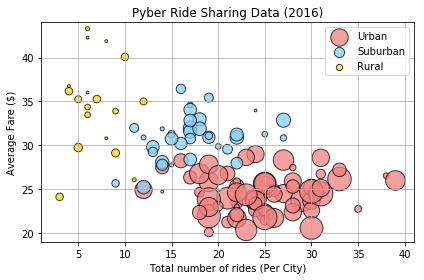

In [15]:

# Create a handle for each plot
urban = plt.scatter(urban_city_total_rides, urban_city_avg_fare, 
                      s=urban_city_total_drivers*8, alpha=0.75, 
                      edgecolors="black", c='lightcoral'
                     ,label="Urban"
                    )
suburban = plt.scatter(suburban_city_total_rides, suburban_city_avg_fare, 
                    s=suburban_city_total_drivers*8, alpha=0.75, 
                    edgecolors="black", c='lightskyblue',
                    label="Suburban"
                       )
rural = plt.scatter(rural_city_total_rides, rural_city_avg_fare, 
            s=rural_city_total_drivers*8, alpha=0.75,
            edgecolors="black", c='gold',
                    label="Rural"
                    )

# Incorporate the other graph properties


# Create a legend
plt.legend(handles=[urban, suburban, rural], loc="best")



# Title and Labels
plt.title ("Pyber Ride Sharing Data (2016)")
plt.xlabel ("Total number of rides (Per City)")
plt.ylabel ("Average Fare ($)")


# Limits for x and y axis
plt.xlim (1, 41)
plt.ylim (19, 44)


#gridlines
plt.grid(axis='both')
plt.tight_layout()


# Incorporate a text label regarding circle size
#plt.label

# Save Figure
plt.savefig('Images/PyberAvgFareVSRides.png')

# Show plot 
plt.show()

## Total Fares by City Type

In [16]:
urban_city_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

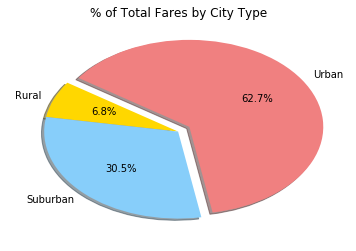

In [17]:
# Calculate Type Percents
total_city_type = urban_df['fare'].sum() + suburban_df['fare'].sum() + rural_df['fare'].sum()


urban_percent = urban_df['fare'].sum() / total_city_type * 100 
suburban_percent = suburban_df['fare'].sum() / total_city_type * 100 
rural_percent = rural_df['fare'].sum() / total_city_type * 100 

labels = ['Urban', 'Rural', 'Suburban']
colors = ['lightcoral','gold', 'lightskyblue']
explode = [0.1, 0, 0]

# Build Pie Chart
plt.pie([urban_percent, rural_percent, suburban_percent], 
        explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=280)

# Title
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("Images/PieCityFare.png")

## Total Rides by City Type

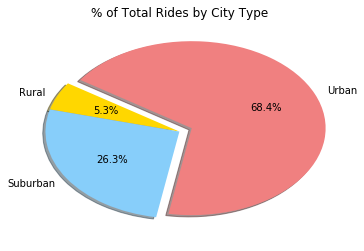

In [18]:
# Calculate Ride Percents
total_rides_type = urban_df['ride_id'].count() + suburban_df['ride_id'].count() + rural_df['ride_id'].count()

# Build Pie Chart
urban_ride_percent = urban_df['ride_id'].count() / total_rides_type *100
suburban_ride_percent = suburban_df['ride_id'].count() / total_rides_type *100
rural_ride_percent = rural_df['ride_id'].count() / total_rides_type *100


labels = ['Urban', 'Rural', 'Suburban']
colors = ['lightcoral','gold', 'lightskyblue']
explode = [0.1, 0, 0]


plt.pie([urban_ride_percent, rural_ride_percent, suburban_ride_percent], 
        explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=260)


# Title
plt.title("% of Total Rides by City Type")



# Save Figure
plt.savefig("Images/Ride_Percent.png")

#show Figure
plt.show()


## Total Drivers by City Type

In [20]:
# Calculate Ride Percents

urban_driver_count = city_df.loc[city_df['type']=='Urban',['driver_count']].sum()
#print(urban_driver_count)

suburban_driver_count = city_df.loc[city_df['type']=='Suburban',['driver_count']].sum()
#print(suburban_driver_count)

rural_driver_count = city_df.loc[city_df['type']=='Rural',['driver_count']].sum()
#print(rural_driver_count)

total_driver_count_type = urban_driver_count + suburban_driver_count + rural_driver_count




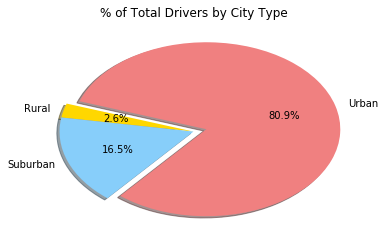

In [21]:

# Build Pie Chart
urban_drivers_percent = urban_driver_count / total_driver_count_type *100
suburban_drivers_percent = suburban_driver_count / total_driver_count_type *100
rural_drivers_percent = rural_driver_count / total_driver_count_type *100


labels = ['Urban', 'Rural', 'Suburban']
colors = ['lightcoral','gold', 'lightskyblue']
explode = [0.1, 0, 0]


plt.pie([urban_drivers_percent, rural_drivers_percent, suburban_drivers_percent], 
        explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=230)


# Title
plt.title("% of Total Drivers by City Type")



# Save Figure
plt.savefig("Images/Drivers_Percent.png")

#show figure
plt.show()